In [56]:
# Import lib 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
# Read the data
returns = pd.read_excel('f_score_returns.xlsx', index_col=0)
returns.shape

(18, 9)

In [250]:
returns = returns/100

In [251]:
returns.index = pd.to_datetime(returns.index, format="%Y").to_period('Y')
returns

,1,2,3,4,5,6,7,8,9
Year,,,,,,,,,
2002,0.0266,0.05750,0.0377,-0.10590,-0.0457,0.0031,-0.0280,0.07540,0.1473
2003,-0.0580,0.13490,0.2009,0.28950,0.2682,0.2344,0.3006,0.34190,0.3923
2004,0.0033,-0.11510,-0.1073,-0.18630,-0.3137,-0.3313,-0.4750,-0.13110,-0.2307
2005,-0.0884,-0.01200,0.0332,0.04910,0.0603,0.0485,0.1073,0.18880,0.2775
2006,0.1875,0.18800,0.1366,0.05030,0.1402,0.2246,0.2007,0.21420,0.2547
2007,0.0666,0.18580,0.1538,0.19980,0.2966,0.1153,0.1242,0.07950,0.1167
2008,0.0395,0.02920,0.0349,0.03070,0.0439,0.0410,0.0427,0.02990,0.1021
2009,0.0235,0.01520,0.0623,0.13240,0.0719,0.0682,0.0585,0.00950,-0.0510
2010,0.0086,0.02820,0.0467,0.08640,0.0731,0.0744,0.0759,0.14370,0.1615


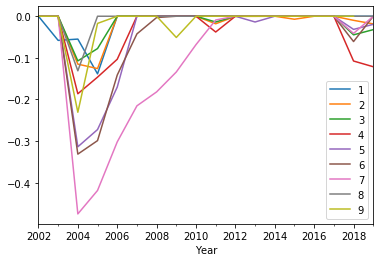

In [252]:
# Maximum drawdown
wealth_index = 1000 * (1+returns).cumprod()
previous_peaks = wealth_index.cummax()
drawdown = (wealth_index - previous_peaks)/previous_peaks
# Plot the drawdown 
drawdown.plot.line()

In [253]:
# Deviation 
returns.std(ddof=0).sort_values(ascending=False)

7    0.155587
5    0.135310
9    0.131603
6    0.127944
4    0.117158
8    0.100343
3    0.078509
2    0.076175
1    0.056067
dtype: float64

In [254]:
# Semideviation 
returns[returns<0].std(ddof=0).sort_values(ascending=False)


7    0.207654
6    0.135250
5    0.123207
9    0.089850
4    0.060190
3    0.038896
2    0.038892
1    0.015200
8    0.000000
dtype: float64

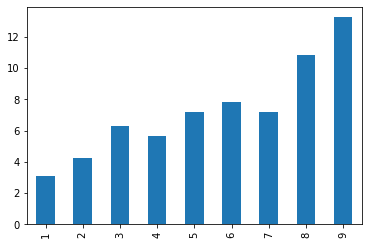

In [255]:
(returns*100).mean().plot.bar()

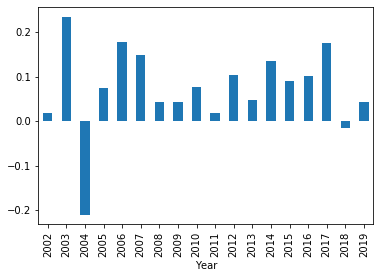

In [260]:
returns.T.mean().plot.bar()

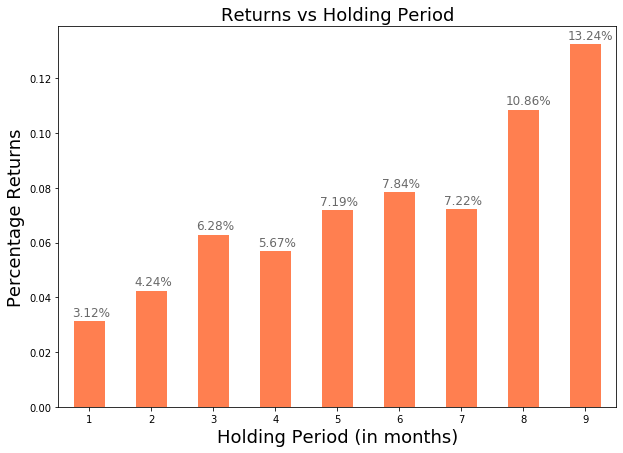

In [243]:
ax = returns.mean().plot(kind='bar', figsize=(10,7),
                                        color="coral", fontsize=10);
ax.set_alpha(0.8)
ax.set_title("Returns vs Holding Period", fontsize=18)
ax.set_ylabel("Percentage Returns", fontsize=18);
ax.set_xlabel("Holding Period (in months)", fontsize=18);
ax.set_xticklabels(returns.columns, rotation=0)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.002, \
            str(round((i.get_height())*100, 2))+'%', fontsize=12,
                color='dimgrey')

In [242]:
returns.mean()

1    0.031200
2    0.042394
3    0.062794
4    0.056749
5    0.071861
6    0.078378
7    0.072183
8    0.108563
9    0.132400
dtype: float64

In [234]:
var_historic(returns.fillna(0))*100

1     6.2560
2     3.2650
3     5.4090
4    11.9405
5     8.5900
6    10.1375
7    10.6355
8     1.1590
9     7.7955
dtype: float64

In [117]:
def var_historic(r, level=5):
    '''
    ARG
        r: Dataframe with the returns
        level: percentile level
    Returns 
        percentile for each column
    '''
    
    # Check the type of data
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else: 
        raise TypeError("Expected r to be a series or dataframe")

In [126]:
var_his = var_historic(returns.fillna(0))

In [138]:
from scipy.stats import norm

# Compute the z score assuming the data is gaussian 
# Percent point function
z = norm.ppf(0.05)

In [125]:
var_gauss = -(returns.mean() + z*returns.std(ddof=0))

In [143]:
# Make a skewness function 
def skewness(r):
    '''
        ARGS:
            Series or Dataframe
        RETURNS: 
            Float or a series data with the calculated skewness
    '''
    
    # Calculate the demeaned returns 
    demeaned_r = r - r.mean()
    
    # Use the population standard deviation, ddof=0
    sigma_r = r.std(ddof=0)
    
    # Calculate the expectation of the demeaned returns raised to the third power
    exp = (demeaned_r**3).mean()
    
    # Calcualte the skew
    skew = exp/sigma_r**3
    return skew

# Make a kurtosis function 
def kurtosis(r):
    '''
        ARGS:
            Series or Dataframe
        RETURNS: 
            Float or a series data with the calculated kurtosis
    '''
    
    # Calculate the demeaned returns 
    demeaned_r = r - r.mean()
    
    # Use the population standard deviation, ddof=0
    sigma_r = r.std(ddof=0)
    
    # Calculate the expectation of the demeaned returns raised to the fourth power
    exp = (demeaned_r**4).mean()
    
    # Calcualte the skew
    kurt = exp/sigma_r**4
    return kurt

In [144]:
k = kurtosis(returns)
s = skewness(returns)
stats = pd.concat([s, k], axis=1)
stats.columns = ["Skewness", "Kurtosis"]
stats['Excess Kurtosis'] = stats['Kurtosis'] - 3
stats

,Skewness,Kurtosis,Excess Kurtosis
1,0.514737,4.954032,1.954032
2,0.365898,2.770523,-0.229477
3,-0.109635,2.489155,-0.510845
4,-0.157877,2.622837,-0.377163
5,-0.772742,4.594804,1.594804
6,-1.559644,6.329343,3.329343
7,-2.179482,8.860237,5.860237
8,-0.057631,3.691450,0.691450
9,-0.822833,4.683939,1.683939


In [129]:
# Calculate kurtosis and skew
k = kurtosis(returns)
s = skewness(returns)
z = norm.ppf(0.05)
# Update z
z = (z + (z**2 - 1)*s/6 + (z**3 - 3*z)*(k-3)/24 - (2 * z**3 - 5*z)*(s**2)/36)
# Calculate the VaR with modified z
mcf_var = -(returns.mean() + z*returns.std(ddof=0))
mcf_var

1    0.050328
2    0.075141
3    0.069579
4    0.142052
5    0.174554
6    0.174353
7    0.247845
8    0.056725
9    0.108702
dtype: float64

In [135]:
# Compare all three by making a bar plot 
results = [var_gauss*100, mcf_var*100, var_historic(returns.fillna(0), level=5)*100]
comparison=pd.concat(results, axis=1)
comparison.columns = ["Gaussian", "Cornish-Fisher", "Historic"]
comparison

,Gaussian,Cornish-Fisher,Historic
1,6.102205,5.032849,6.2560
2,8.290319,7.514148,3.2650
3,6.634056,6.957887,5.4090
4,13.595763,14.205230,11.9405
5,15.070427,17.455369,8.5900
6,13.207185,17.435266,10.1375
7,18.373509,24.784470,10.6355
8,5.648751,5.672490,1.1590
9,8.406699,10.870248,7.7955


[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9')]

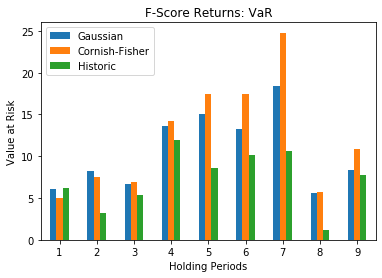

In [145]:
# Plot the comparison DataFrame
ax = comparison.plot.bar(title="F-Score Returns: VaR")
ax.set_xlabel("Holding Periods")
ax.set_ylabel("Value at Risk")
ax.set_xticklabels(returns.columns, rotation=0)

In [146]:
rfr = [7.308, 5.616, 5.117, 6.994, 8.238, 7.845, 9.316, 6.998, 7.803, 8.454, 8.245, 8.172, 8.718, 7.806, 7.163, 6.456, 7.772, 6.369]

In [182]:
# Create rfr dataframe
rf = pd.DataFrame({'year': returns.index, 'risk_free_rate': rfr}).set_index('year')
rf = rf/100
rf

,risk_free_rate
year,
2002,0.07308
2003,0.05616
2004,0.05117
2005,0.06994
2006,0.08238
2007,0.07845
2008,0.09316
2009,0.06998
2010,0.07803


In [184]:
def rf_sub(ser):
    return(ser - rf['risk_free_rate'])

In [246]:
sharpe_ratios = ((returns).aggregate(rf_sub).mean()/returns.std(ddof=0))

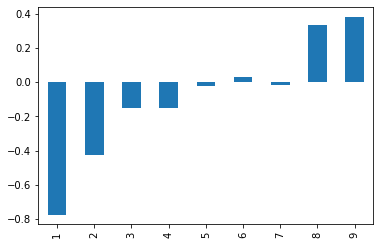

In [247]:
sharpe_ratios.plot.bar()

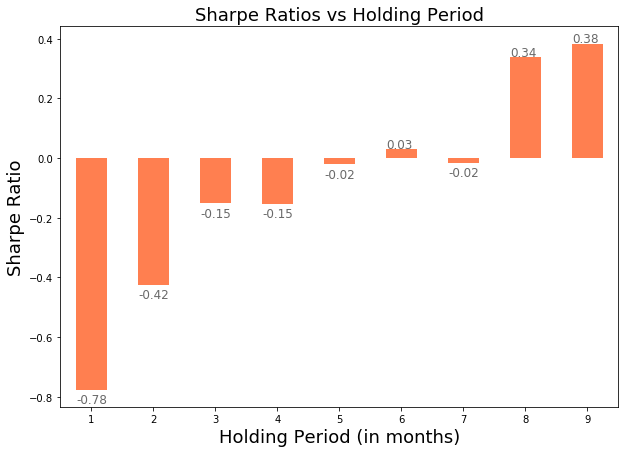

In [248]:
ax = sharpe_ratios.plot(kind='bar', figsize=(10,7),
                                        color="coral", fontsize=10);
ax.set_alpha(0.8)
ax.set_title("Sharpe Ratios vs Holding Period", fontsize=18)
ax.set_ylabel("Sharpe Ratio", fontsize=18);
ax.set_xlabel("Holding Period (in months)", fontsize=18);
ax.set_xticklabels(returns.columns, rotation=0)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    if i.get_height() > 0:
        h = i.get_height()+.005
    else: 
        h = i.get_height()- 0.045
    ax.text(i.get_x()-.0001, h, \
            str(round((i.get_height()), 2)), fontsize=12,
                color='dimgrey')

In [232]:
sharpe_ratios

1   -0.775164
2   -0.423592
3   -0.151151
4   -0.152885
5   -0.020693
6    0.029049
7   -0.015925
8    0.337856
9    0.433833
dtype: float64